# Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка данных

In [2]:

data1 = pd.read_excel('/Users/vera/Desktop/Data_Science/ДИПЛОМ/data/X_bp.xlsx')
data2 = pd.read_excel('/Users/vera/Desktop/Data_Science/ДИПЛОМ/data/X_nup.xlsx')

merged_data = pd.merge(data1, data2, left_index=True, right_index=True, how='inner')

# Разведочный анализ данных

In [3]:
merged_data.head()

,Unnamed: 0_x,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Unnamed: 0_y,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,0,4.0,57.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,1,0,4.0,60.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,2,0,4.0,70.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,3,0,5.0,47.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,4,0,5.0,57.0


In [3]:
data = merged_data.drop(columns='Unnamed: 0_x')
data = data.drop(columns='Unnamed: 0_y')



In [4]:
data.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [13]:
data.size

13299

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [15]:
data.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


# Предобработка данных

In [5]:
# Разделение на признаки и целевые переменные
X = data.drop(columns=['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'])
y = data[['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']]


In [17]:
# Вывод максимальных и минимальных значений до нормализации
print("До нормализации:")
print("Максимальные значения:")
print(X.max())
print("Минимальные значения:")
print(X.min())

До нормализации:
Максимальные значения:
Соотношение матрица-наполнитель       5.591742
Плотность, кг/м3                   2207.773481
модуль упругости, ГПа              1911.536477
Количество отвердителя, м.%         198.953207
Содержание эпоксидных групп,%_2      33.000000
Температура вспышки, С_2            413.273418
Поверхностная плотность, г/м2      1399.542362
Потребление смолы, г/м2             414.590628
Угол нашивки, град                   90.000000
Шаг нашивки                          14.440522
Плотность нашивки                   103.988901
dtype: float64
Минимальные значения:
Соотношение матрица-наполнитель       0.389403
Плотность, кг/м3                   1731.764635
модуль упругости, ГПа                 2.436909
Количество отвердителя, м.%          17.740275
Содержание эпоксидных групп,%_2      14.254985
Температура вспышки, С_2            100.000000
Поверхностная плотность, г/м2         0.603740
Потребление смолы, г/м2              33.803026
Угол нашивки, град            

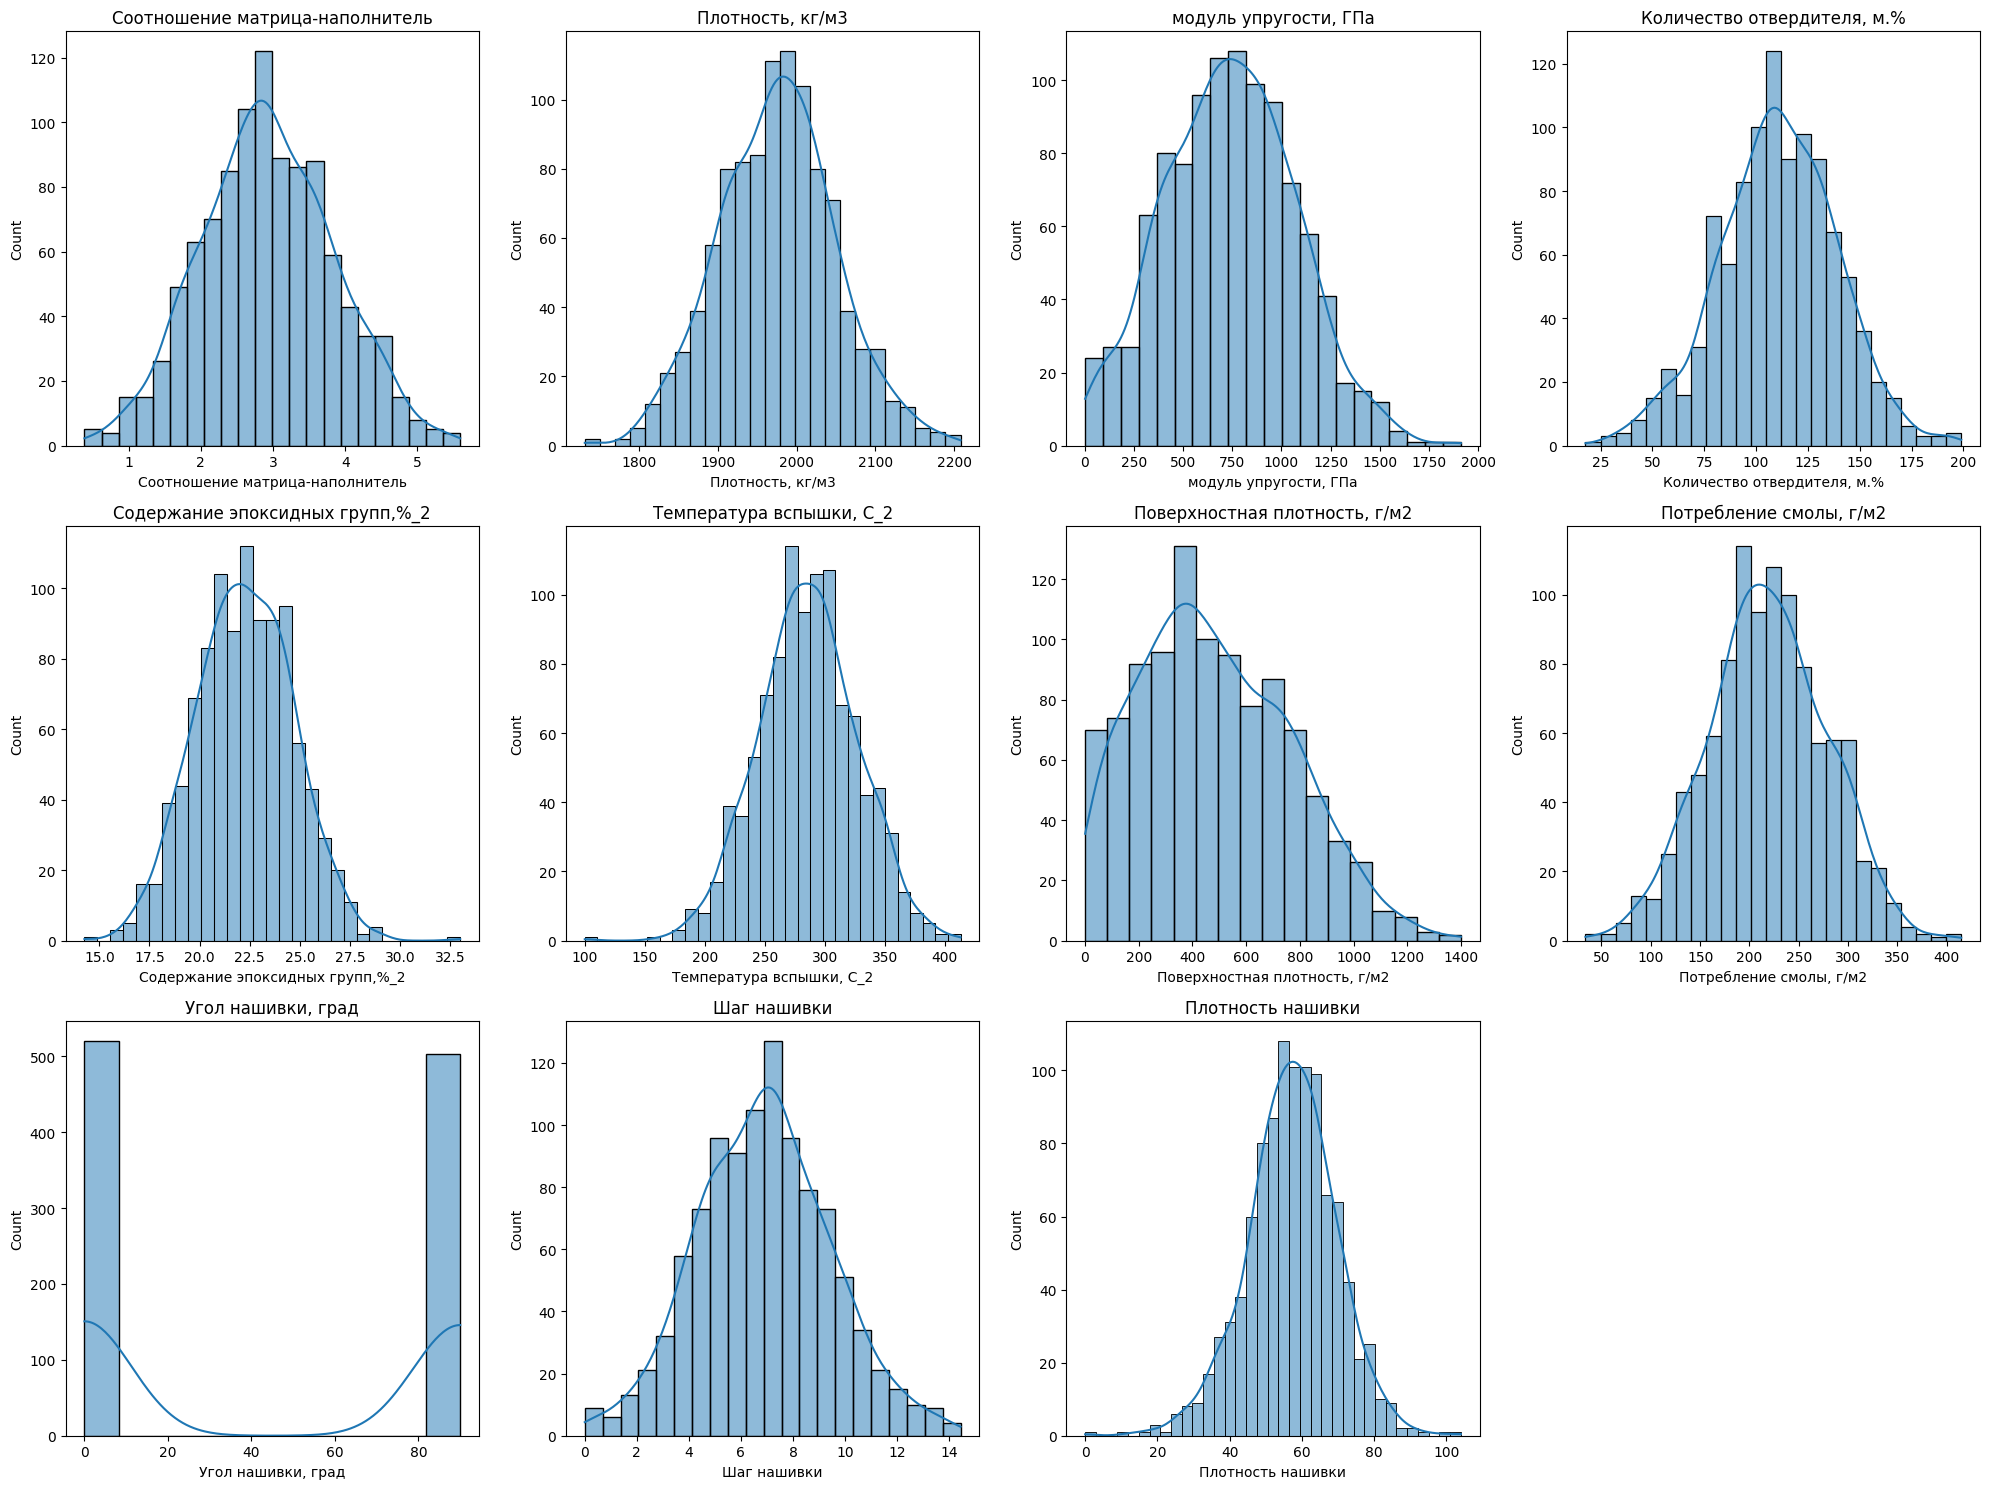

In [18]:
# Графики распределения до нормализации
plt.figure(figsize=(20, 15))
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(X[column], kde=True)
    plt.title(f'{column}')
plt.tight_layout()
plt.show()

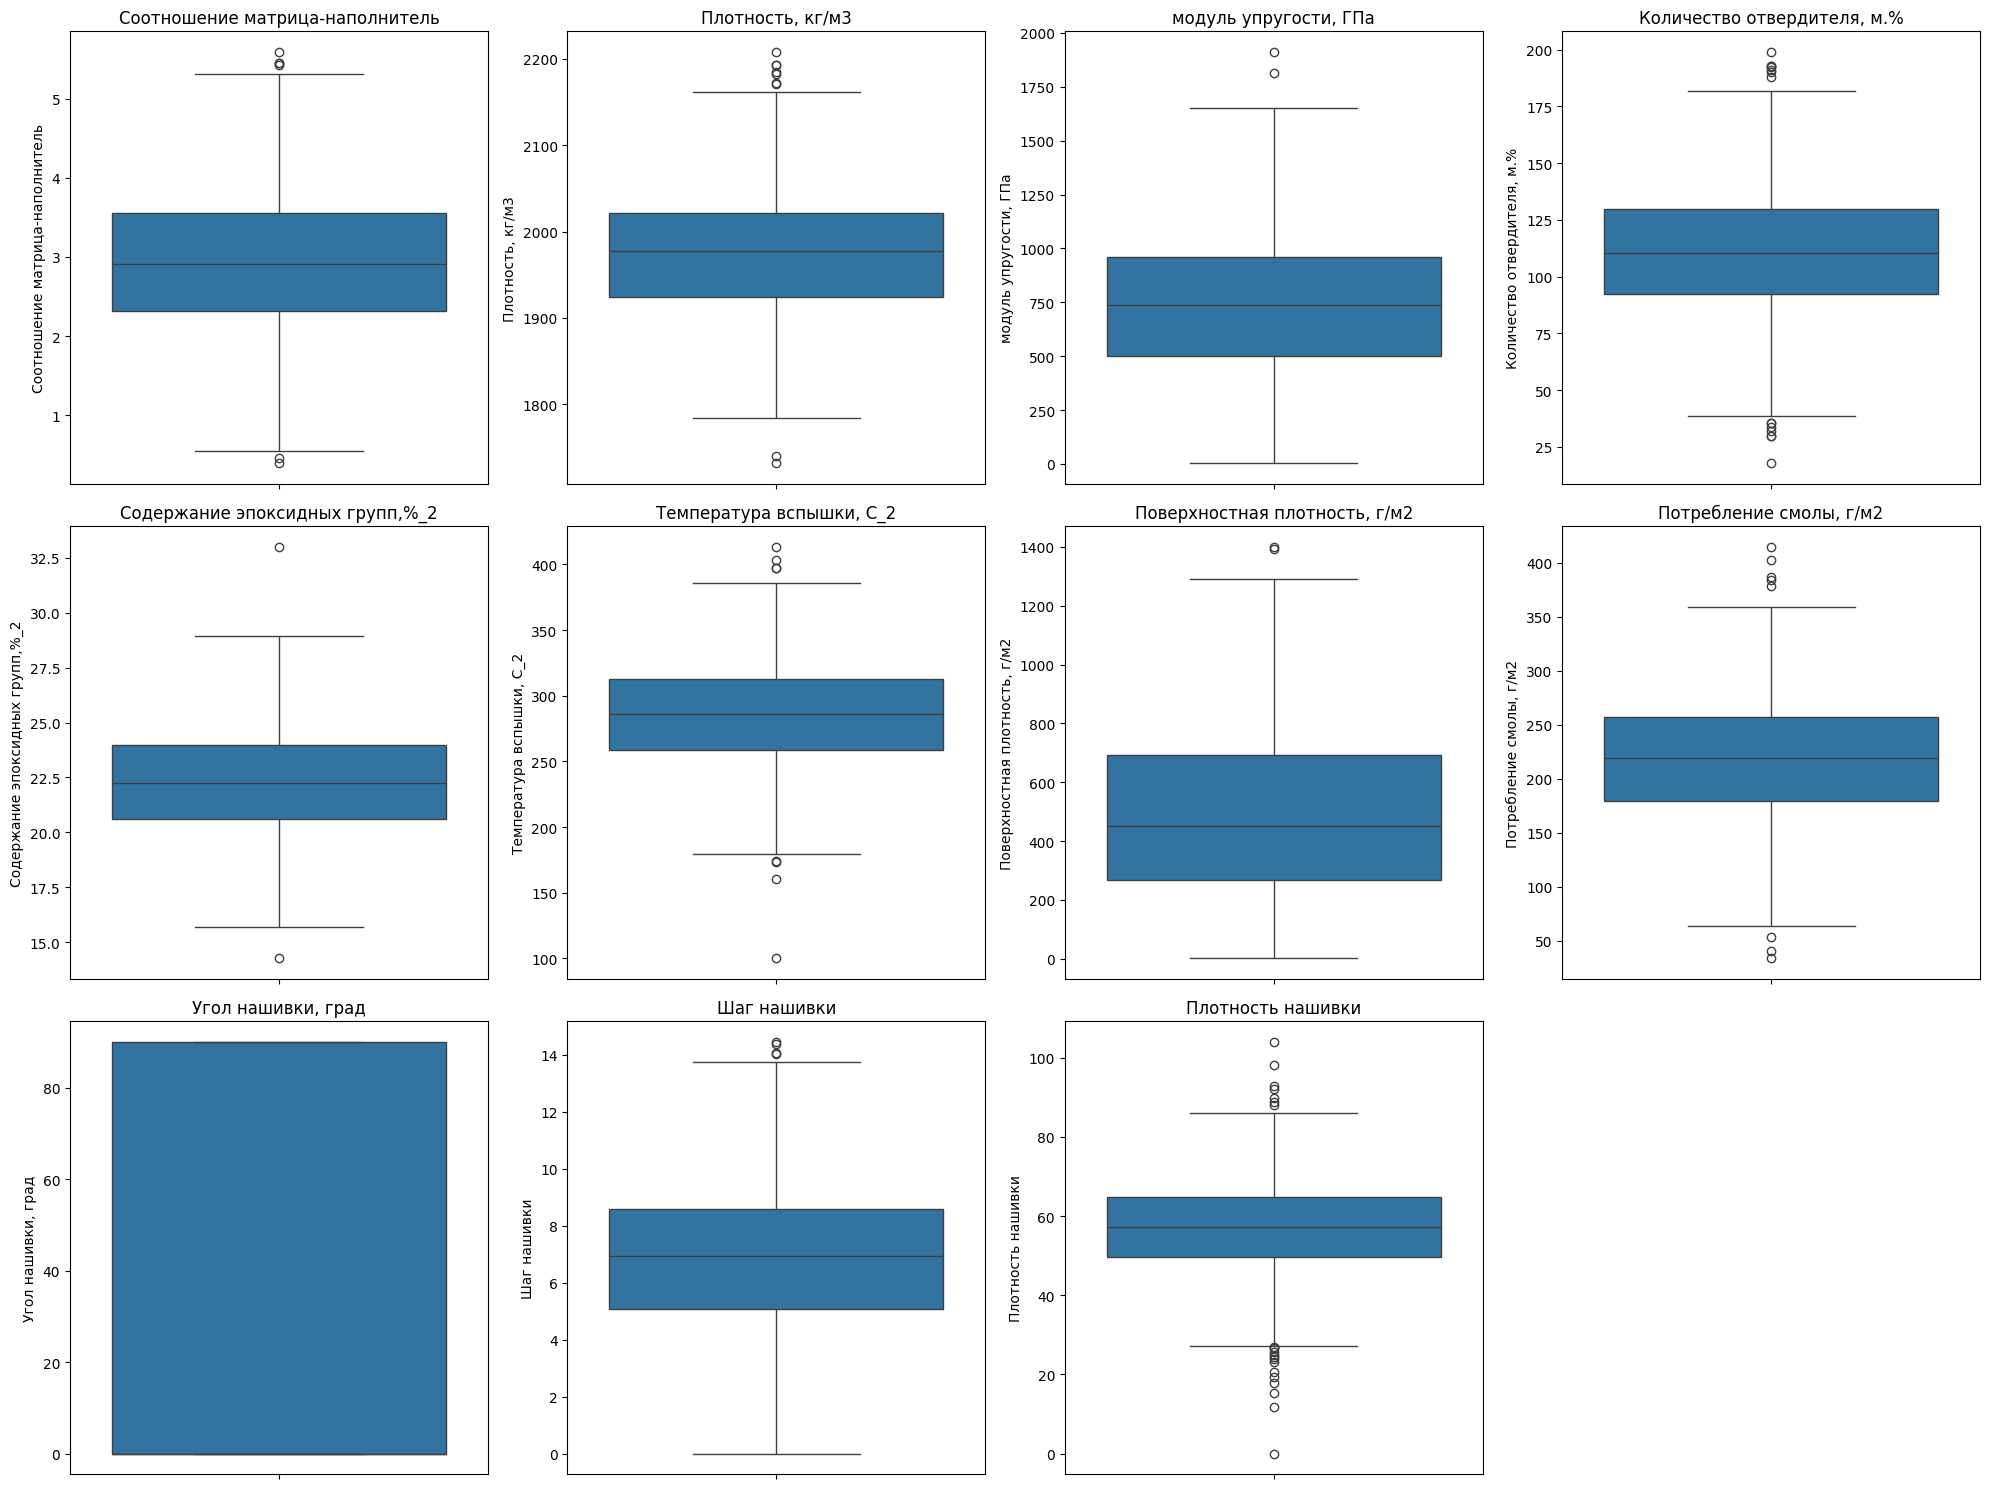

In [19]:
# Диаграммы "усов и ящиков" до нормализации
plt.figure(figsize=(20, 15))
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=X[column])
    plt.title(f'{column}')
plt.tight_layout()
plt.show()

In [20]:
# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [21]:
# Вывод максимальных и минимальных значений после нормализации
print("После нормализации:")
print("Максимальные значения:")
print(X_scaled_df.max())
print("Минимальные значения:")
print(X_scaled_df.min())

После нормализации:
Максимальные значения:
Соотношение матрица-наполнитель    2.915695
Плотность, кг/м3                   3.148712
модуль упругости, ГПа              3.549589
Количество отвердителя, м.%        3.125033
Содержание эпоксидных групп,%_2    4.471955
Температура вспышки, С_2           3.112932
Поверхностная плотность, г/м2      3.260615
Потребление смолы, г/м2            3.285517
Угол нашивки, град                 1.016758
Шаг нашивки                        2.943275
Плотность нашивки                  3.793863
dtype: float64
Минимальные значения:
Соотношение матрица-наполнитель   -2.783776
Плотность, кг/м3                  -3.310622
модуль упругости, ГПа             -2.234332
Количество отвердителя, м.%       -3.282308
Содержание эпоксидных групп,%_2   -3.321825
Температура вспышки, С_2          -4.542215
Поверхностная плотность, г/м2     -1.714677
Потребление смолы, г/м2           -3.092116
Угол нашивки, град                -0.983518
Шаг нашивки                       -2.692

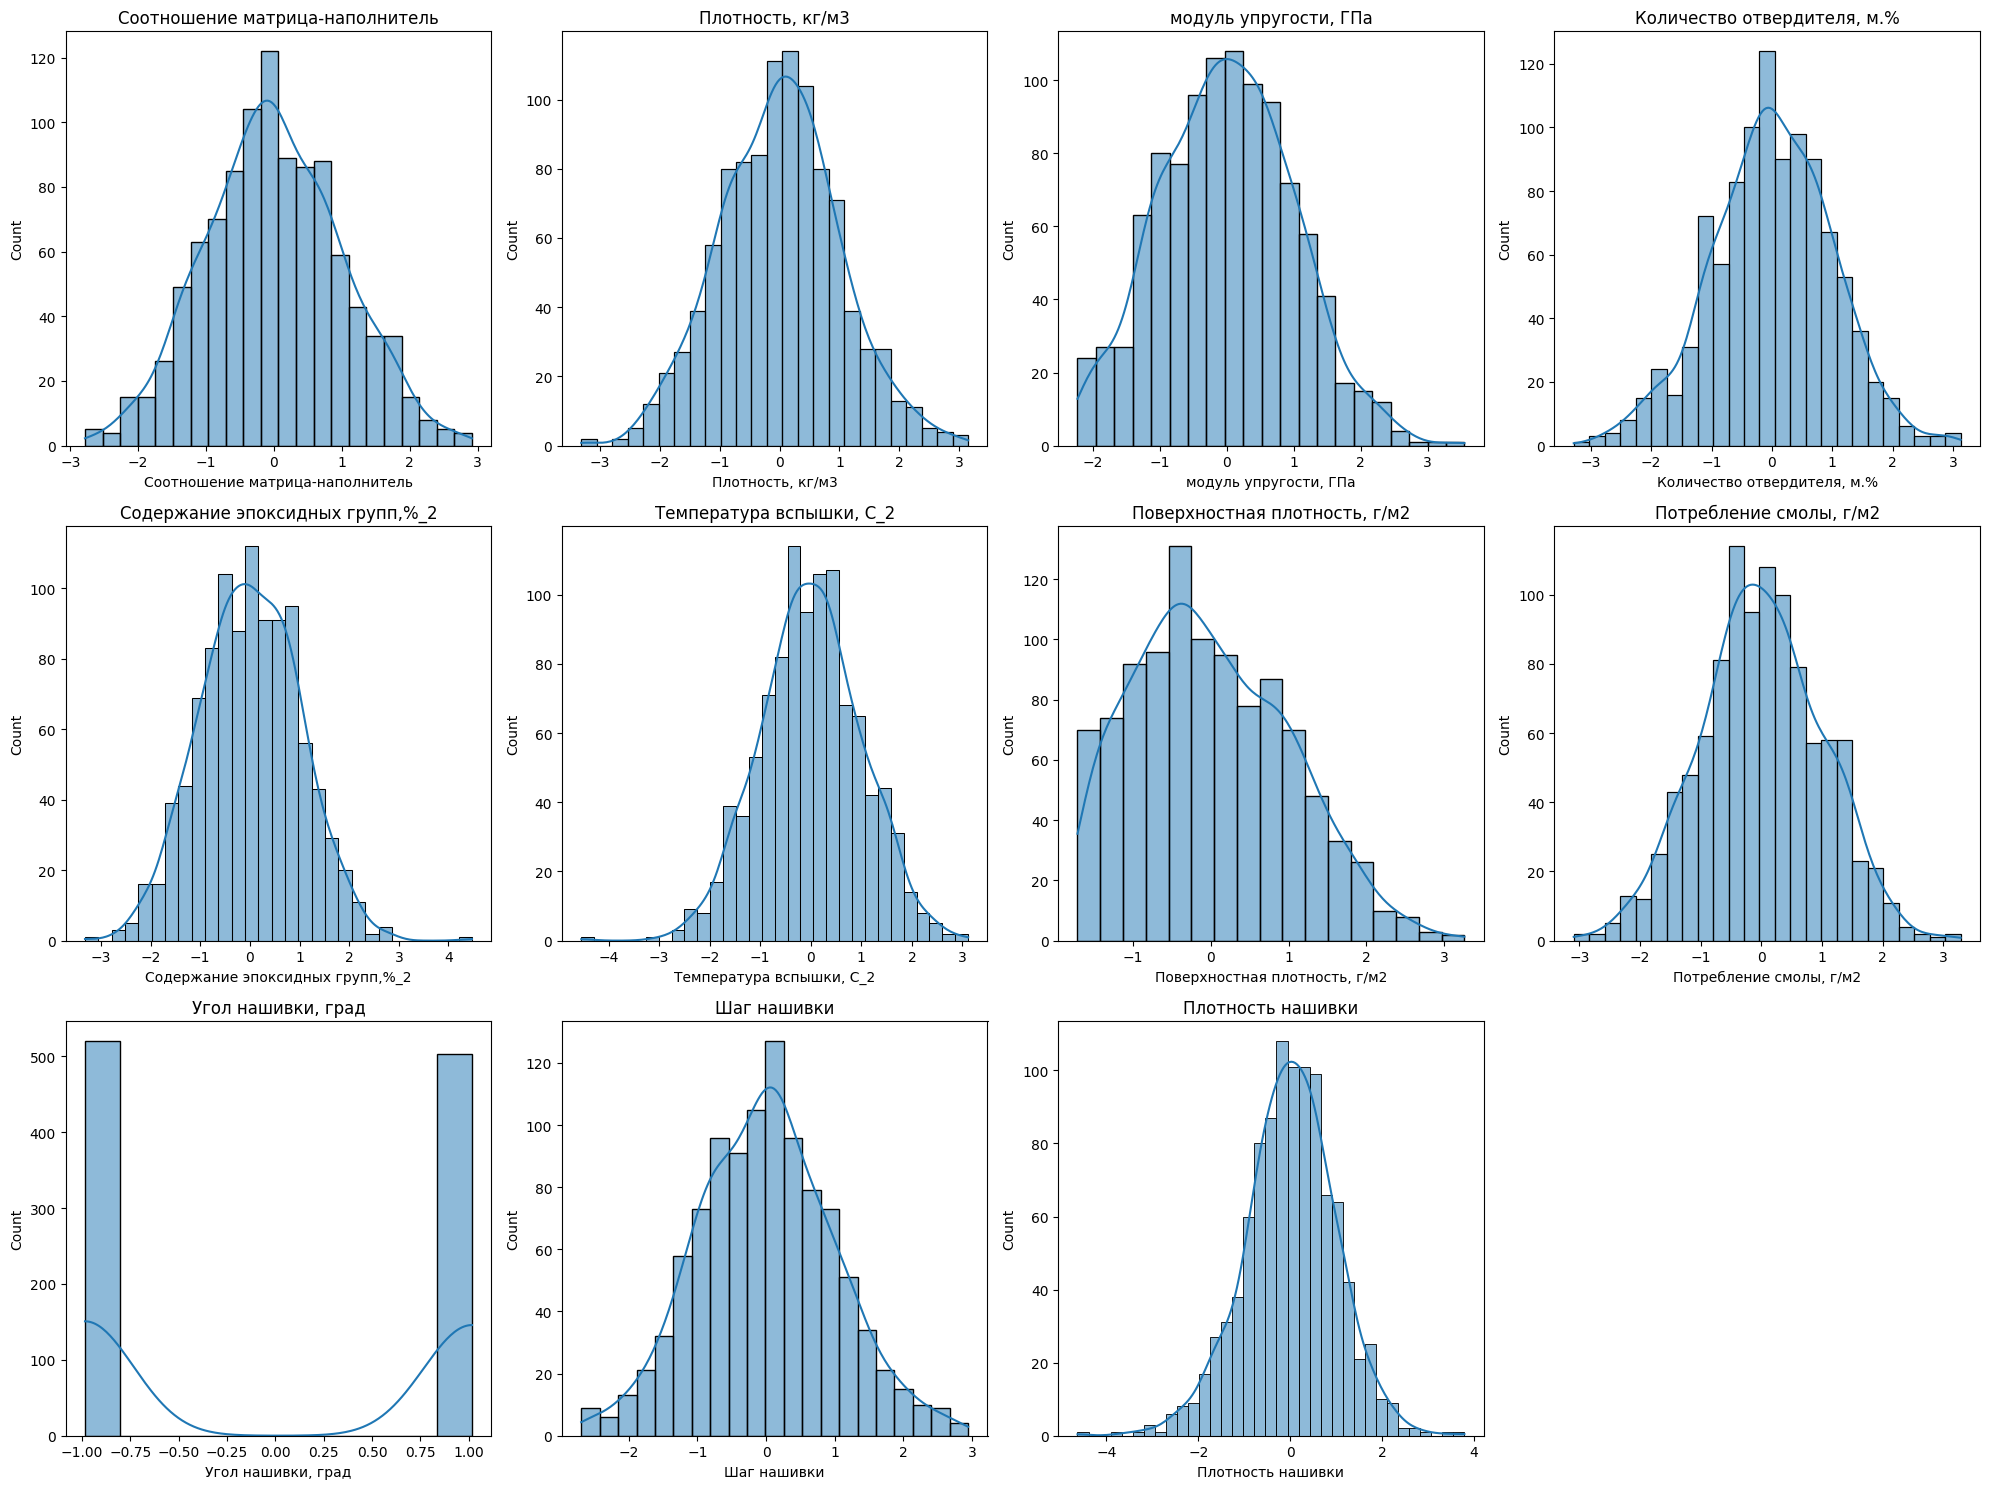

In [22]:
# Графики распределения после нормализации
plt.figure(figsize=(20, 15))
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(X_scaled_df[column], kde=True)
    plt.title(f'{column}')
plt.tight_layout()
plt.show()

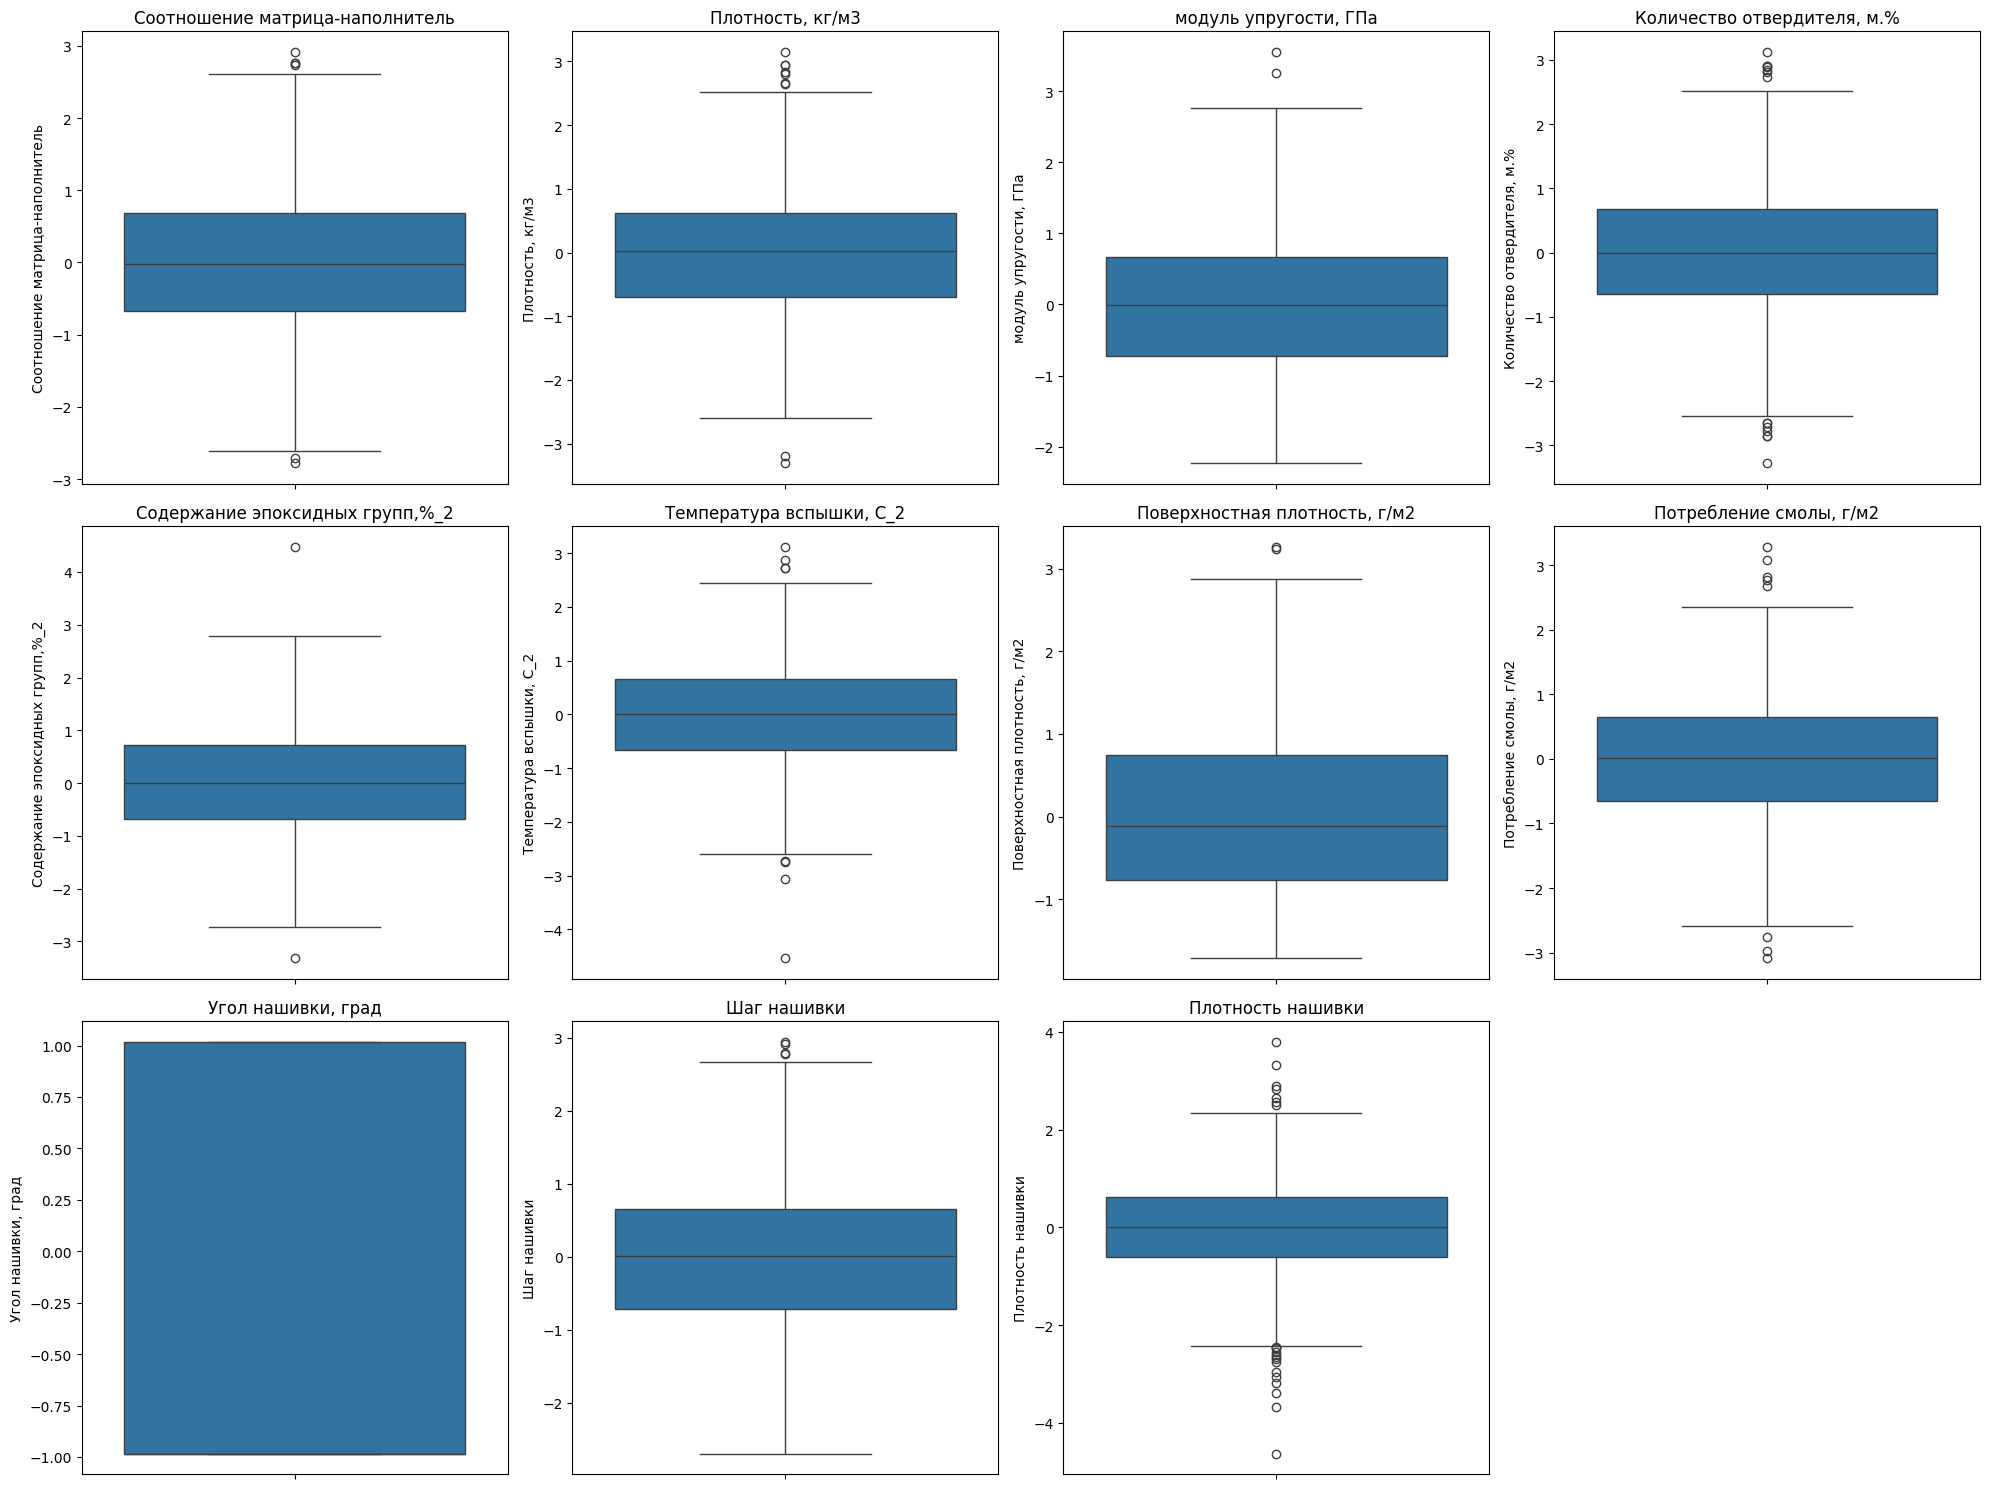

In [23]:
# Диаграммы "усов и ящиков" после нормализации
plt.figure(figsize=(20, 15))
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=X_scaled_df[column])
    plt.title(f'{column}')
plt.tight_layout()
plt.show()

In [24]:
# Анализ корреляции
correlation_matrix = data.corr()

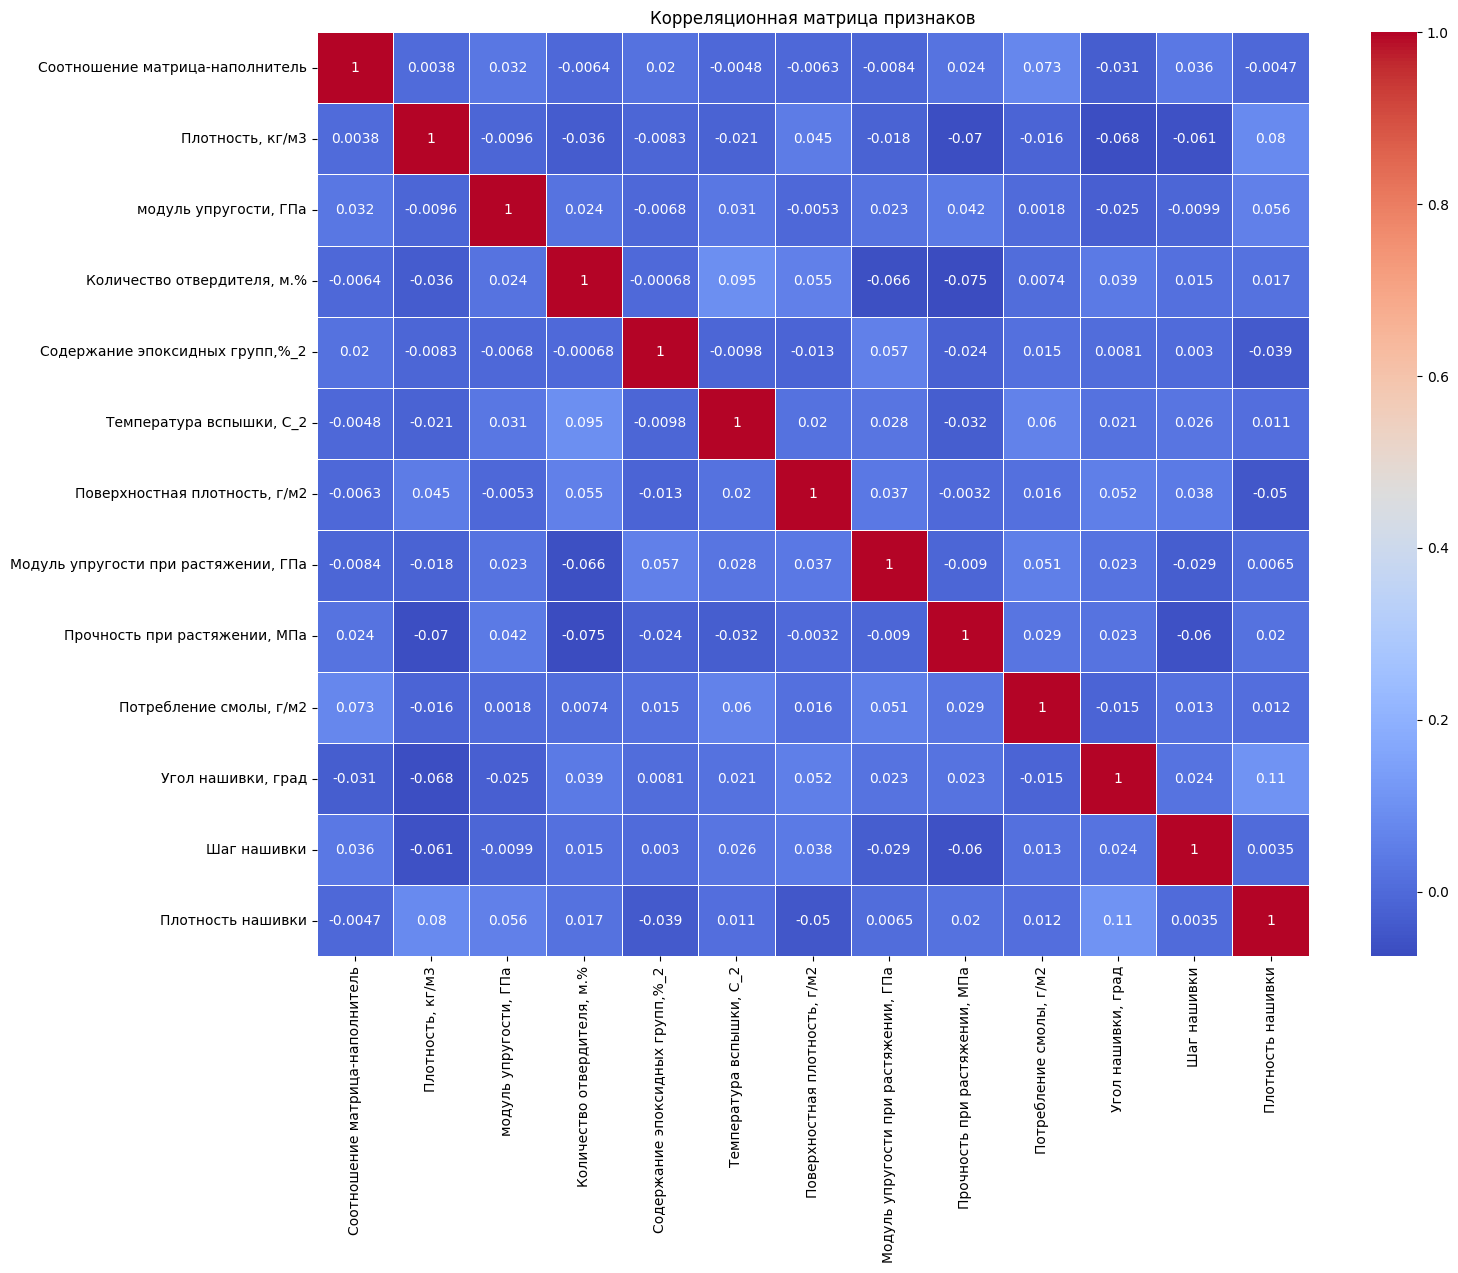

In [25]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица признаков')
plt.show()

# Разработка и обучение модели

In [6]:
# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Создание пайплайна
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Стандартизация данных
    ('regressor', MultiOutputRegressor(SVR()))  # Метод SVR для многоцелевой регрессии
])

In [8]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', MultiOutputRegressor(estimator=SVR()))])

#  Тестирование модели

### RandomForestRegressor

In [9]:
# Оценка модели на тренировочной выборке
y_train_pred = pipeline.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
print('R^2 на тренировочной выборке:', train_r2)
print('MSE на тренировочной выборке:', train_mse)

R^2 на тренировочной выборке: 0.08404088737602117
MSE на тренировочной выборке: 119877.27616162879


In [10]:
# Оценка модели на тестовой выборке
y_test_pred = pipeline.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print('R^2 на тестовой выборке:', test_r2)
print('MSE на тестовой выборке:', test_mse)

R^2 на тестовой выборке: -0.028040806427828135
MSE на тестовой выборке: 108580.42597430316


In [11]:
# Прогнозирование
predictions = pipeline.predict(X_test)

In [12]:
predictions[0]

array([  73.62337489, 2454.8817357 ])

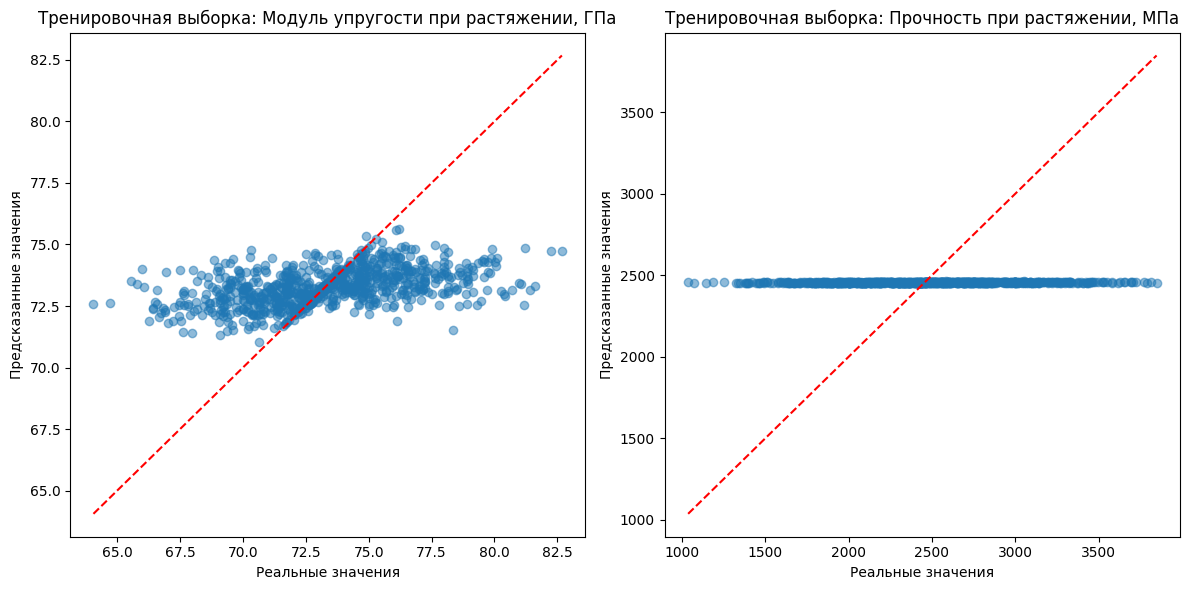

In [17]:
# График наложения предсказанных и реальных данных на тренировочной выборке
plt.figure(figsize=(12, 6))

# Модуль упругости при растяжении, ГПа
plt.subplot(1, 2, 1)
plt.scatter(y_train['Модуль упругости при растяжении, ГПа'], y_train_pred[:, 0], alpha=0.5)
plt.plot([y_train['Модуль упругости при растяжении, ГПа'].min(), y_train['Модуль упругости при растяжении, ГПа'].max()],
         [y_train['Модуль упругости при растяжении, ГПа'].min(), y_train['Модуль упругости при растяжении, ГПа'].max()],
         'r--')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Тренировочная выборка: Модуль упругости при растяжении, ГПа')

# Прочность при растяжении, МПа
plt.subplot(1, 2, 2)
plt.scatter(y_train['Прочность при растяжении, МПа'], y_train_pred[:, 1], alpha=0.5)
plt.plot([y_train['Прочность при растяжении, МПа'].min(), y_train['Прочность при растяжении, МПа'].max()],
         [y_train['Прочность при растяжении, МПа'].min(), y_train['Прочность при растяжении, МПа'].max()],
         'r--')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Тренировочная выборка: Прочность при растяжении, МПа')

plt.tight_layout()
plt.show()


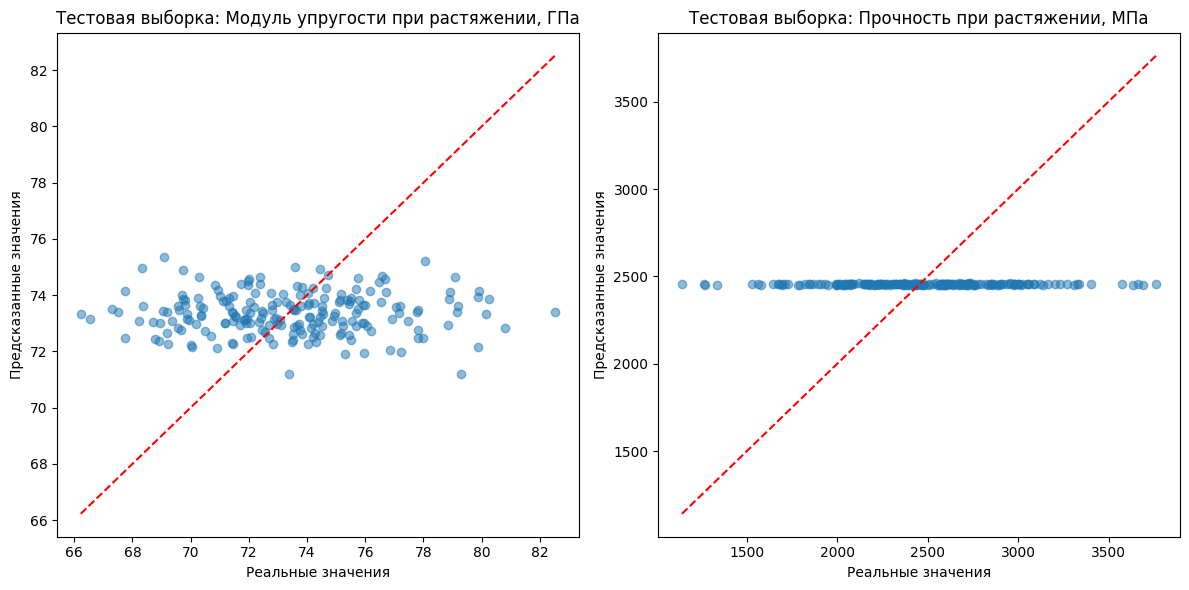

In [14]:
# График наложения предсказанных и реальных данных на тестовой выборке
plt.figure(figsize=(12, 6))

# Модуль упругости при растяжении, ГПа
plt.subplot(1, 2, 1)
plt.scatter(y_test['Модуль упругости при растяжении, ГПа'], y_test_pred[:, 0], alpha=0.5)
plt.plot([y_test['Модуль упругости при растяжении, ГПа'].min(), y_test['Модуль упругости при растяжении, ГПа'].max()],
         [y_test['Модуль упругости при растяжении, ГПа'].min(), y_test['Модуль упругости при растяжении, ГПа'].max()],
         'r--')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Тестовая выборка: Модуль упругости при растяжении, ГПа')

# Прочность при растяжении, МПа
plt.subplot(1, 2, 2)
plt.scatter(y_test['Прочность при растяжении, МПа'], y_test_pred[:, 1], alpha=0.5)
plt.plot([y_test['Прочность при растяжении, МПа'].min(), y_test['Прочность при растяжении, МПа'].max()],
         [y_test['Прочность при растяжении, МПа'].min(), y_test['Прочность при растяжении, МПа'].max()],
         'r--')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Тестовая выборка: Прочность при растяжении, МПа')

plt.tight_layout()
plt.show()